# Simple experiments with trivial models stacking Conv, MaxPool and Dropout blocks

In [58]:
%matplotlib inline
import pandas as pd

import sys; sys.path.append("../code")
import utils

from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout

X, y = utils.load_train()

In [6]:
def model(n_filters=10, filter_size=(4,4)):
    m = Sequential()
    m.add(Conv2D(n_filters, filter_size, input_shape=(28,28,1,)))
    m.add(Flatten())
    m.add(Dense(10, activation='softmax'))
    # Added accuracy metric to the compile() call!
    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return m

In [26]:
# The model of the previous notebook got 8.1919 loss in 1 epoch. Seems it was luck!!
m = model()
m.fit(X, y, epochs=1)

Epoch 1/1
42000/42000 [==============================] - 14s 322us/step - loss: 12.7850 - acc: 0.2064


In [ ]:
def train(n_filters, filter_size, epochs=1):
    return model(n_filters, filter_size).fit(X, y, epochs=epochs, validation_split=0.05)

In [28]:
for n_filters in [2, 5, 10, 15, 20, 30]:
    train(n_filters, (4, 4))

Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 11s 281us/step - loss: 3.2130 - acc: 0.7870 - val_loss: 2.1741 - val_acc: 0.8600
Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 12s 299us/step - loss: 10.3629 - acc: 0.3561 - val_loss: 9.4917 - val_acc: 0.4110
Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 13s 325us/step - loss: 11.3790 - acc: 0.2927 - val_loss: 10.6996 - val_acc: 0.3352
Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 15s 367us/step - loss: 11.6181 - acc: 0.2784 - val_loss: 10.9563 - val_acc: 0.3200
Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 17s 421us/step - loss: 10.3947 - acc: 0.3534 - val_loss: 9.9154 - val_acc: 0.3848
Train on 39900 samples, validate on 2100 samples
Epoch 1/1


In [30]:
train(1, (4, 4));

Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 12s 295us/step - loss: 5.5559 - acc: 0.6431 - val_loss: 3.8443 - val_acc: 0.7548


In [31]:
train(2, (4, 4));

Train on 39900 samples, validate on 2100 samples
Epoch 1/1
39900/39900 [==============================] - 12s 291us/step - loss: 9.8355 - acc: 0.3881 - val_loss: 9.2434 - val_acc: 0.4248


In [15]:
history = train(20, (4, 4), epochs=10)

Train on 39900 samples, validate on 2100 samples
Epoch 1/10
39900/39900 [==============================] - 15s 385us/step - loss: 11.7660 - acc: 0.2691 - val_loss: 11.1346 - val_acc: 0.3090
Epoch 2/10
39900/39900 [==============================] - 15s 380us/step - loss: 10.9246 - acc: 0.3220 - val_loss: 10.5076 - val_acc: 0.3481
Epoch 3/10
39900/39900 [==============================] - 17s 416us/step - loss: 9.9006 - acc: 0.3855 - val_loss: 10.2465 - val_acc: 0.3643
Epoch 4/10
39900/39900 [==============================] - 16s 398us/step - loss: 9.8139 - acc: 0.3909 - val_loss: 9.8092 - val_acc: 0.3914
Epoch 5/10
39900/39900 [==============================] - 17s 422us/step - loss: 9.6239 - acc: 0.4028 - val_loss: 9.4180 - val_acc: 0.4152
Epoch 6/10
39900/39900 [==============================] - 15s 372us/step - loss: 9.5828 - acc: 0.4053 - val_loss: 9.8944 - val_acc: 0.3857
Epoch 7/10
39900/39900 [==============================] - 15s 374us/step - loss: 9.3810 - acc: 0.4179 - val_loss

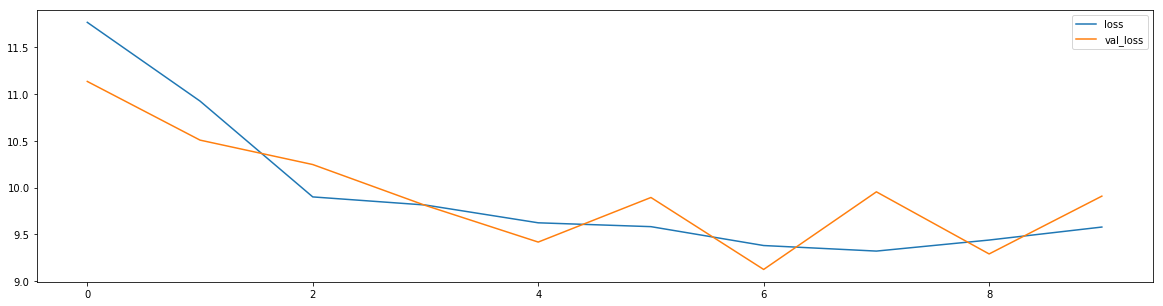

In [21]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(20, 5));

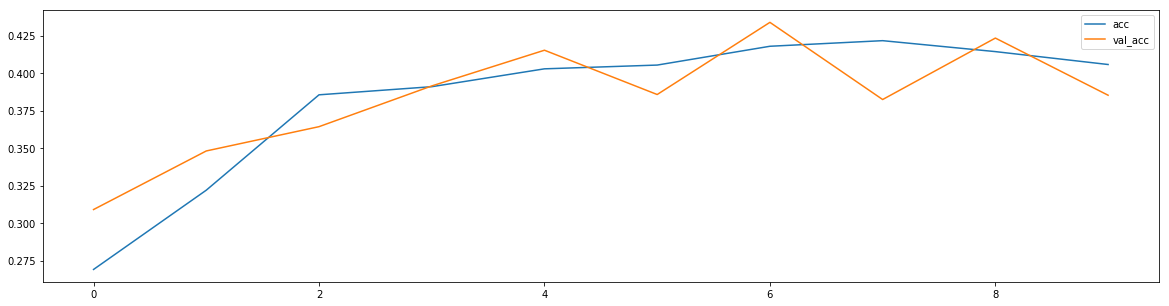

In [23]:
pd.DataFrame(history.history)[['acc', 'val_acc']].plot(figsize=(20, 5));

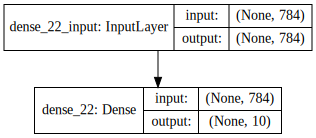

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [48]:
def softmax():
    m = Sequential()
    m.add(Dense(10, activation='softmax', input_shape=(28**2,)))
    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return m
          
m = softmax()
utils.plot(m, True)
m.summary()

In [49]:
m.fit(X.reshape((42000, 28**2)), y, epochs=10);

Epoch 1/10
42000/42000 [==============================] - 5s 117us/step - loss: 10.2228 - acc: 0.3617
Epoch 2/10
42000/42000 [==============================] - 5s 112us/step - loss: 9.1225 - acc: 0.4318
Epoch 3/10
42000/42000 [==============================] - 5s 108us/step - loss: 9.0507 - acc: 0.4368
Epoch 4/10
42000/42000 [==============================] - 4s 106us/step - loss: 9.0185 - acc: 0.4389
Epoch 5/10
42000/42000 [==============================] - 4s 107us/step - loss: 8.9624 - acc: 0.4427
Epoch 6/10
42000/42000 [==============================] - 4s 106us/step - loss: 9.0046 - acc: 0.4402
Epoch 7/10
42000/42000 [==============================] - 5s 109us/step - loss: 8.9676 - acc: 0.4427
Epoch 8/10
42000/42000 [==============================] - 5s 109us/step - loss: 8.9547 - acc: 0.4435
Epoch 9/10
42000/42000 [==============================] - 5s 107us/step - loss: 8.9064 - acc: 0.4465
Epoch 10/10
42000/42000 [==============================] - 5s 109us/step - loss: 8.9111 - 

In [54]:
import numpy as np

submission_name = "simple_softmax"

test = pd.read_csv(utils.TEST)
X_test = test.values.reshape((test.shape[0], 28**2))

pd.DataFrame({
                'ImageId': range(1, 28001),
                'Label': np.argmax(m.predict(X_test), axis=-1)}
                ).to_csv(f"{utils.SUBMISSION_PATH}/{submission_name}.csv", index=False)

acc = utils.submit_to_server(submission_name)
acc

Successfully submitted to Digit Recognizer
Sleeping 30 secs before checking for score...
Model accuracy is 0.42714


0.42714

In [71]:
def shallow_simple_model():
    m = Sequential()
    
    m.add(Conv2D(10, (4,4), input_shape=(28,28,1,)))
    m.add(MaxPool2D())
    m.add(Dropout(0.05))
    m.add(Flatten())
    m.add(Dense(10, activation='softmax'))
    
    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return m

In [74]:
m = shallow_simple_model()
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 25, 25, 10)        170       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1440)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                14410     
Total params: 14,580
Trainable params: 14,580
Non-trainable params: 0
_________________________________________________________________


In [73]:
h = m.fit(X, y, epochs=3, validation_split=0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/3
39900/39900 [==============================] - 16s 399us/step - loss: 7.8693 - acc: 0.5073 - val_loss: 7.2704 - val_acc: 0.5462
Epoch 2/3
39900/39900 [==============================] - 15s 369us/step - loss: 7.0041 - acc: 0.5634 - val_loss: 7.0543 - val_acc: 0.5610
Epoch 3/3
39900/39900 [==============================] - 15s 378us/step - loss: 6.9032 - acc: 0.5701 - val_loss: 6.9088 - val_acc: 0.5705


In [75]:
def shallow_simple_model_v2():
    m = Sequential()
    
    m.add(Conv2D(10, (3,3), input_shape=(28,28,1,)))
    m.add(MaxPool2D())
    m.add(Dropout(0.01))
    m.add(Flatten())
    m.add(Dense(10, activation='softmax'))
    
    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return m

m = shallow_simple_model_v2()
h = m.fit(X, y, epochs=3, validation_split=0.05)

Train on 39900 samples, validate on 2100 samples
Epoch 1/3
39900/39900 [==============================] - 15s 364us/step - loss: 7.0791 - acc: 0.5530 - val_loss: 5.1230 - val_acc: 0.6738
Epoch 2/3
39900/39900 [==============================] - 14s 353us/step - loss: 3.3588 - acc: 0.7849 - val_loss: 3.3226 - val_acc: 0.7848
Epoch 3/3
39900/39900 [==============================] - 14s 351us/step - loss: 2.6719 - acc: 0.8287 - val_loss: 2.9740 - val_acc: 0.8095


In [93]:
def simple_model():
    m = Sequential()
    
    m.add(Conv2D(10, (3,3), input_shape=(28,28,1,)))
    m.add(MaxPool2D())
    m.add(Dropout(0.01))
    
    m.add(Conv2D(10, (3,3), input_shape=(28,28,1,)))
    m.add(MaxPool2D())
    m.add(Dropout(0.01))
    
    m.add(Conv2D(10, (3,3), input_shape=(28,28,1,)))
    m.add(MaxPool2D())
    m.add(Dropout(0.01))
    
    m.add(Flatten())
    m.add(Dense(10, activation='softmax'))
    
    m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return m

m = simple_model()
print(m.summary())
m.fit(X, y, epochs=5)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 13, 13, 10)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 3, 3, 10)          910       
__________

In [94]:
utils.submit(m, "keras_simple_3_blocks_conv_max_pool_dropout", submit_to_kaggle=True)

Successfully submitted to Digit Recognizer
Sleeping 30 secs before checking for score...
Model accuracy is 0.93028


0.93028

In [96]:
utils.check_submissions()

,date,accuracy
submission,,
keras_simple_3_blocks_conv_max_pool_dropout.csv,2018-11-13 02:45:23,0.93028
simple_softmax.csv,2018-11-13 02:23:51,0.42714
keras_model_1_100_epochs.csv,2018-11-13 01:52:07,0.64814
keras_model_1_11_epochs.csv,2018-11-13 01:29:00,0.62214
keras_model_1.csv,2018-11-13 01:09:58,0.52800
dummy_cuadrant_resolution_4.csv,2018-11-09 04:11:23,0.88485
dummy_2_features_log_reg.csv,2018-11-09 03:37:48,0.12842
dummy_all_ones.csv,2018-11-09 02:43:28,0.11614
sample_submission.csv,2018-11-09 02:22:35,0.10014


In [97]:
m.fit(X, y, epochs=10)
utils.submit(m, "keras_simple_3_blocks_conv_max_pool_dropout_15_epochs", submit_to_kaggle=True)
utils.check_submissions()

Epoch 1/10
42000/42000 [==============================] - 19s 451us/step - loss: 0.1977 - acc: 0.9400
Epoch 2/10
42000/42000 [==============================] - 19s 451us/step - loss: 0.1784 - acc: 0.9463
Epoch 3/10
42000/42000 [==============================] - 19s 451us/step - loss: 0.1696 - acc: 0.9473
Epoch 4/10
42000/42000 [==============================] - 19s 450us/step - loss: 0.1580 - acc: 0.9516
Epoch 5/10
42000/42000 [==============================] - 19s 451us/step - loss: 0.1512 - acc: 0.9541
Epoch 6/10
42000/42000 [==============================] - 19s 452us/step - loss: 0.1467 - acc: 0.9537
Epoch 7/10
42000/42000 [==============================] - 19s 457us/step - loss: 0.1384 - acc: 0.9571
Epoch 8/10
42000/42000 [==============================] - 19s 456us/step - loss: 0.1343 - acc: 0.9584
Epoch 9/10
42000/42000 [==============================] - 20s 474us/step - loss: 0.1334 - acc: 0.9584
Epoch 10/10
42000/42000 [==============================] - 19s 458us/step - loss: 

KeyError: 'the label [keras_simple_3_blocks_conv_max_pool_dropout_15_epochs.csv] is not in the [index]'

 ### 5 submissions per day limit!

In [98]:
utils.check_submissions()

,date,accuracy
submission,,
keras_simple_3_blocks_conv_max_pool_dropout.csv,2018-11-13 02:45:23,0.93028
simple_softmax.csv,2018-11-13 02:23:51,0.42714
keras_model_1_100_epochs.csv,2018-11-13 01:52:07,0.64814
keras_model_1_11_epochs.csv,2018-11-13 01:29:00,0.62214
keras_model_1.csv,2018-11-13 01:09:58,0.52800
dummy_cuadrant_resolution_4.csv,2018-11-09 04:11:23,0.88485
dummy_2_features_log_reg.csv,2018-11-09 03:37:48,0.12842
dummy_all_ones.csv,2018-11-09 02:43:28,0.11614
sample_submission.csv,2018-11-09 02:22:35,0.10014
